## Mineração
### Trabalho de classificação IRIS
### Luis FIlipe Kopp

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.display import clear_output

Após importar as bibliotecas, carrega-se a base de dados, já disponível no sklearn. A Descrição da base é apresentada em seguida.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Uma pré- análise nos dados não apresentou anormalidades. Existem 3 grupos com 50 objetos cada. Espera-se que alguns dos parâmetros sejam altamente correlacionados e isso pode ser problema para alguns métodos.

In [3]:
for x in [0,50,100]:
    display(pd.DataFrame(X[x:x+50]).describe())

,0,1,2,3
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


,0,1,2,3
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


,0,1,2,3
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Definimos a classe Perceptron, que inicializa as variáveis/ parâmetros, cria a função fit, para treinar (calibrar a matriz de pesoas da rede) e a predict, para aplicar a matriz de pesos nos dados de teste. Não fizemos a validação e temos o risco de overfitness, mas como temos poucos dados, ficamos com poucas opções. 

Em <b>FIT</b>, criamos uma matriz randômica de tamanho (parâmetros de X (4), classes de y (3)), com valores entre -0.5 e 0.5.

Em seguida, criamos um loop de n_iter iterações, onde a matriz X é multiplicada pela matriz pesos. Aplica-se a função sigmoid para manter tudo entre 0 e 1. Depois o índice do maior valor de cada linha é usado para determinar a classe daquela linha. 

Na iteração, ainda é calculada a ocorrência de classes previstas diferente das classes disponíveis na base de dados. Esse valor de número de erros é usado no passo a seguir.

Uma matriz randômica de mesmo tamanho de pesoas é criada, multiplicamos ela pelo número de erros e learning rate. Ou seja, se tem muito erro, ela pode procurar através de random walk com passos maiores uma solução interessante. O learning rate ajusta o tamanho do passo padrão. Depois, somamos com a matriz peso disponível.

Caso após a soma da matriz a previsão melhore, a matriz peso é substituída pela matriz obtida.

Criamos também a variável self_correction, que aumenta os passos a cada iteração onde não houve melhoria de previsão. Ou seja, se houve melhoria, pode-se procurar um ponto ótimo perto, senão vai aumentando os passos até achar algum outro ponto ótimo.

A função <b>PREDICT</b> aplica os pesos disponíveis nos dados de entrada.

In [14]:
class Perceptron:

    def __init__(self, learning_rate=.2, n_iter=1000):
        self.weights = None
        self.weights2 = None
        self.learning_rate = learning_rate
        self.input_size = 0
        self.output_size = 0
        self.n_iter = n_iter
        self.errors = []
        self.y_hat = []
        self.y_hat2 = []
        self.correction = 1
        #print("l_rate: ",self.learning_rate,"n_iter: ",self.n_iter)
        #print("weights: ",self.weights)
        
    def fit(self, X, y):
        self.input_size = len(y)
        self.output_size = len(np.unique(y))
        self.weights = np.random.rand(X.shape[1], self.output_size) 
        y_temp = []

        for _ in range(self.n_iter):
            self.correction += 0.2
            self.y_hat = np.argmax(self._sigmoid(np.dot(X, self.weights)), axis = 1)
            err = sum(y != self.y_hat)
            self.errors.append(err / self.input_size)
            self.weights2 = self.weights.copy()
            self.weights2 += (np.random.rand(X.shape[1], self.output_size) - 0.5 )* self.correction * self.learning_rate * err / self.input_size   
            self.y_hat2 = np.argmax(self._sigmoid(np.dot(X, self.weights2)), axis = 1)
            err2 = sum(y != self.y_hat2)
            if err2 < err:
                #print("o", flush=True, end="")
                self.correction = 0
                self.weights = self.weights2.copy()
                if err2 < 1: break
            #else: print(".", flush=True, end="")
        plt.plot(clf.errors)
        #print('')
        return self

    def _sigmoid(self, x): 
        s = 1/(1 + np.exp(-x))
        return s
    
    def _sigmoid2(self, x): 
        s = x * (1-x)
        return s
    
    def predict(self, X):
        return np.argmax(self._sigmoid(np.dot(X, self.weights)), axis = 1)





Abaixo, aplicamos a classe perceptron nos dados diversas vezes, para obter significância estatística nos resultados.

Com 2000-2500 iterações já temos resultados acima de 90% de acerto.

0.01 ACC MEAN:  0.52667 ACC STD:  0.18299
0.012589254117941675 ACC MEAN:  0.59333 ACC STD:  0.13519
0.015848931924611134 ACC MEAN:  0.59111 ACC STD:  0.1246
0.0199526231496888 ACC MEAN:  0.61556 ACC STD:  0.14574
0.025118864315095794 ACC MEAN:  0.64 ACC STD:  0.20913
0.03162277660168379 ACC MEAN:  0.67556 ACC STD:  0.08207
0.039810717055349734 ACC MEAN:  0.69111 ACC STD:  0.09911
0.05011872336272722 ACC MEAN:  0.75556 ACC STD:  0.12413
0.06309573444801933 ACC MEAN:  0.73333 ACC STD:  0.11111
0.07943282347242814 ACC MEAN:  0.74222 ACC STD:  0.13991
0.1 ACC MEAN:  0.74222 ACC STD:  0.1367
0.12589254117941673 ACC MEAN:  0.70222 ACC STD:  0.14579
0.15848931924611134 ACC MEAN:  0.76222 ACC STD:  0.13036
0.19952623149688797 ACC MEAN:  0.71333 ACC STD:  0.13387
0.251188643150958 ACC MEAN:  0.75778 ACC STD:  0.10997
0.31622776601683794 ACC MEAN:  0.80889 ACC STD:  0.12618
0.3981071705534972 ACC MEAN:  0.75778 ACC STD:  0.15977
0.5011872336272722 ACC MEAN:  0.78889 ACC STD:  0.13526
0.630957344

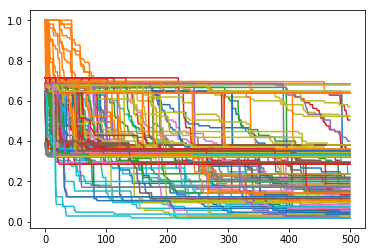

In [16]:
teste = []
for p in range(-20,0):
    p = 10**(p/10)
    np.random.seed(42)
    acc_list = []
    for i in range(10):
        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

        #criando o classificador
        clf = Perceptron(learning_rate=p, n_iter=500)

        # vamos aprender!
        clf.fit(X_train, y_train)

        # utilizando o modelo para prever
        y_hat = clf.predict(X_test)

        # medindo acertos
        acc = accuracy_score(y_test, y_hat)
        acc_list.append(acc)
        #clear_output()
    print(p,"ACC MEAN: ", np.round(np.mean(acc_list),5), "ACC STD: ", np.round(np.std(acc_list),5),flush=True)
    teste.append([p,acc])

In [6]:
t = pd.DataFrame(teste)

In [7]:
t

,0,1
0,0.001,0.600000
1,0.010,0.666667
2,0.020,0.888889
3,0.050,0.888889
4,0.100,0.688889
5,0.200,0.866667
6,0.400,0.666667
7,0.600,0.800000
8,0.700,0.822222


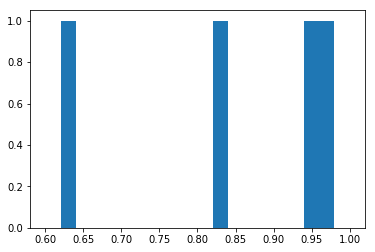

In [8]:
plt.hist(acc_list,bins=20,range=(0.6,1))
plt.show()

### O benchmarking é a função otimizada da própria biblioteca do sklearn

In [9]:
acc_list = []
np.random.seed(42)
for i in range(100):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33)
    
    #criando o classificador
    clf = svm.SVC()
    
    # vamos aprender!
    clf.fit(X_train, y_train)
    
    # utilizando o modelo para prever
    y_hat = clf.predict(X_test)

    
    acc = accuracy_score(y_test, y_hat)
    acc_list.append(acc)

print("NN do sklearn")
print("ACC MEAN: ", np.mean(acc_list))
print("ACC STD: ", np.std(acc_list))

NN do sklearn
ACC MEAN:  0.9704000000000002
ACC STD:  0.02144388024588834


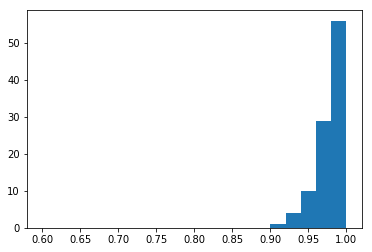

In [10]:
plt.hist(acc_list,bins=20,range=(0.6,1))
plt.show()

### Conclusão:
Nossa abordagemingênua usando random walk para achar um ponto ótimo não é mais eficiente que a função otimizada disponível na biblioteca. Mas apresenta resultados satisfatórios. Como melhorias, podia-se colocar o gradiente descendente e criar uma coluna de bias na ,atriz peso.